# House Price Prediction for Iowa Competition - Kaggle
## Importing Libraries

This section imports essential libraries for various stages of a machine learning project:

- **Data Manipulation and Analysis:**
  - `pandas`: Data manipulation and analysis library.
  - `numpy`: Numerical operations library.

- **Data Visualization:**
  - `matplotlib.pyplot`: Plotting library.
  - `seaborn`: Data visualization library based on Matplotlib.

- **Data Preprocessing:**
  - `OrdinalEncoder`: Encoding categorical features with ordinal information.
  - `StandardScaler`: Standardizing features for machine learning models.

- **Feature Selection:**
  - `mutual_info_regression`: Mutual information for regression tasks.

- **Model Selection and Evaluation:**
  - `train_test_split`: Splitting datasets into training and testing sets.
  - `GridSearchCV`: Grid search for hyperparameter tuning.

- **Ensemble Models:**
  - `RandomForestRegressor`: Random Forest ensemble model for regression.
  - `GradientBoostingRegressor`: Gradient Boosting ensemble model for regression.

- **Neural Network Model:**
  - `MLPRegressor`: Multi-layer Perceptron regressor for neural networks.


In [17]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# Feature Selection
from sklearn.feature_selection import mutual_info_regression

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV

# Ensemble Models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Neural Network Model
from sklearn.neural_network import MLPRegressor

In [18]:
# Set a random seed for reproducibility
random_seed = 0
np.random.seed(random_seed)

# Ignore warning messages to keep the output clean
import warnings
warnings.filterwarnings('ignore')

This code reads the training and testing datasets from CSV files into Pandas DataFrames and concatenates them vertically, creating a new DataFrame named 'merged_dataset'. 
The 'ignore_index=True' parameter is used to reset the index of the resulting DataFrame.


In [19]:
# File paths for the training and testing datasets
train_filepath = "C:/Users/donat/Desktop/Programming Projects/Python Projects/Iowa_Competition/train.csv"
test_filepath = "C:/Users/donat/Desktop/Programming Projects/Python Projects/Iowa_Competition/test.csv"

# Read the training and testing datasets into Pandas DataFrames
train = pd.read_csv(train_filepath)
test = pd.read_csv(test_filepath)

# Concatenate the two DataFrames vertically with 'ignore_index=True' to reset the index
merged_dataset = pd.concat([train, test], ignore_index=True)

## Data Cleaning

In [20]:
# Drop duplicate rows from the DataFrame in place
merged_dataset.drop_duplicates(inplace=True)

# Drop the 'Id' column
merged_dataset.drop(columns=['Id'], inplace=True)

This function `dataset_summary` generates a comprehensive summary of a dataset, including its shape, missing data statistics, data types, and optional visualizations. 
It provides insights into the structure and characteristics of the dataset, making it useful for initial exploration and understanding. 
The function accepts a dataset, optional parameters to control the level of detail, and an option to visualize missing data. 
The summary is displayed in the console, and if visualizations are enabled, a heatmap showing missing data is presented.


In [21]:
def dataset_summary(dataset, show_all_columns=True, visualize=True):
    """
    Generate a summary of the dataset, including shape, missing data statistics, data types, and optional visualizations.

    Parameters:
    - dataset (pd.DataFrame): The dataset to summarize.
    - show_all_columns (bool): Whether to show information for all columns or only columns with missing values.
    - visualize (bool): Whether to visualize missing data.

    Returns:
    - None
    """
    
    # Set Pandas display options to show all columns without truncation
    pd.set_option('display.max_columns', None)

    # Get dataset shape
    dataset_shape = dataset.shape

    # Calculate missing data statistics
    total_cells = np.product(dataset_shape)
    total_missing = dataset.isnull().sum().sum()
    percent_missing = (total_missing / total_cells) * 100

    # Display dataset shape and missing data statistics
    print("------------------------------------------------------------------------")
    print("                     DATASET SUMMARY")
    print("------------------------------------------------------------------------")
    print("     Shape")
    print("------------------------------------")
    print(f"Dataset Shape: {dataset_shape}")
    print(f"Total Cells: {total_cells}")
    print("------------------------------------")
    print("     Missing data ")
    print("------------------------------------")
    print(f"Total Missing: {total_missing}")
    print(f"Percentage of Missing Data: {percent_missing:.2f}%")
    print("------------------------------------")
    print("     Data Types and Counts")
    print("------------------------------------")
    dtype_counts = dataset.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"{dtype}: {count}")
    print("------------------------------------")

    # Calculate missing data statistics
    missing_values = dataset.isnull().sum()

    # Calculate cardinality
    cardinalities = dataset.nunique()

    # Get data types
    data_types = dataset.dtypes

    # Create a Dataet for all columns
    all_info_df = pd.DataFrame({
        'Column Name': dataset.columns,
        'Data Type': data_types.values,
        'Cardinality': cardinalities.values,
        'Missing Values': missing_values.values
    })

    # Group columns by data type
    data_type_groups = all_info_df.groupby('Data Type')

    for dtype, group in data_type_groups:
        print("------------------------------------")
        print(f"     {dtype} Columns")
        print("------------------------------------")
        if show_all_columns:
            print(group)
        else:
            non_zero_missing_info_df = group[group['Missing Values'] > 0]
            print(non_zero_missing_info_df)
        print("------------------------------------")
        
    if visualize:
        # Identify columns with missing values
        columns_with_missing = dataset.columns[dataset.isnull().any()]
    
        # Check if there are any columns with missing values
        if not columns_with_missing.empty:
            # Calculate missing data statistics
            total_cells = np.product(dataset.shape)
            total_missing = dataset.isnull().sum().sum()
            percent_missing = (total_missing / total_cells) * 100
    
            # Visualize missing data for columns with missing values
            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            sns.heatmap(dataset[columns_with_missing].isnull(), cmap='viridis', cbar=False, yticklabels=False)
            plt.title('Missing Data Visualization')
    
            plt.tight_layout()
            plt.show()
        else:
            print("No columns with missing values found. Visualization skipped.")
    else:
        print("")
    
    return


------------------------------------------------------------------------
                     DATASET SUMMARY
------------------------------------------------------------------------
     Shape
------------------------------------
Dataset Shape: (2919, 81)
Total Cells: 236439
------------------------------------
     Missing data 
------------------------------------
Total Missing: 15424
Percentage of Missing Data: 6.52%
------------------------------------
     Data Types and Counts
------------------------------------
object: 43
int64: 26
float64: 12
------------------------------------
------------------------------------
     int64 Columns
------------------------------------
      Column Name Data Type  Cardinality  Missing Values
0              Id     int64         2919               0
1      MSSubClass     int64           16               0
4         LotArea     int64         1951               0
17    OverallQual     int64           10               0
18    OverallCond     int6

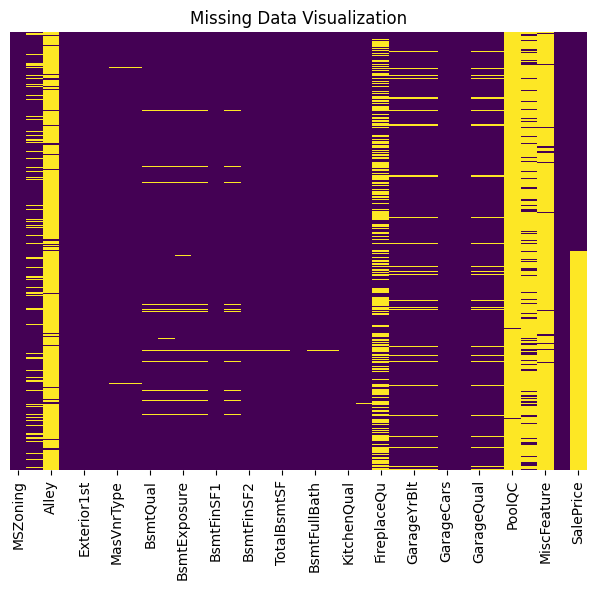

In [22]:
dataset_summary(merged_dataset, show_all_columns=True, visualize=True)

The code block above identifies a list of columns (columns_to_fill_zero) in the dataset and fills any NaN values in these columns with zeros. 
This is a common practice to handle missing numerical data in specific columns. 
Adjust the list of columns as needed for your dataset.

In [23]:
columns_to_fill_zero = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2',
                         'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                         'GarageCars', 'GarageArea']

# Fill NaN values with 0 for selected columns
for column in columns_to_fill_zero:
    merged_dataset[column].fillna(0, inplace=True)

# Ordinal Encoding

The following code snippet applies ordinal encoding to specific columns in the dataset. 
Ordinal encoding is used for categorical variables with an inherent order, assigning numerical values based on their ordinal relationships.

Ordinal encoding is performed using scikit-learn's `OrdinalEncoder`, and missing values are handled by replacing them with "NA" before encoding.


In [24]:
# List of columns to apply ordinal encoding
columns_to_original_encode = ['GarageType', 'LotShape', 'LandContour', 
                              'LandSlope', 'ExterQual', 'ExterCond', 
                              'BsmtQual', 'BsmtCond', 'BsmtExposure',
                              'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
                              'KitchenQual', 'FireplaceQu', 'GarageFinish',
                              'GarageQual', 'GarageCond', 'PoolQC',
                              'Fence']

# Initialize the ordinal encoder
encoder = OrdinalEncoder()

# Loop through each column for ordinal encoding
for column in columns_to_original_encode:
    # Handle missing values by replacing with "NA" and then encoding
    merged_dataset[column].fillna("NA", inplace=True)
    merged_dataset[column] = encoder.fit_transform(merged_dataset[[column]])


# Frequency Encoding 

This code snippet performs frequency encoding on selected categorical columns within the `merged_dataset`. The selected columns are specified in the `columns_to_frequency_encode` list.
- **Fill Missing Values:** 
    Missing values in each column are filled with the string "NA" to ensure all categories are considered during frequency encoding.
- **Calculate Category Frequencies:** 
    For each specified column, the code calculates the frequency (proportion) of each category using `value_counts(normalize=True)`.
- **Replace Categories with Frequencies:**
    Categories in each column are then replaced with their respective frequencies.
Frequency encoding is a technique commonly used in preprocessing categorical data, providing a numerical representation based on the distribution of categories within each column.


In [25]:
# List of columns to perform frequency encoding
columns_to_frequency_encode = ['MSZoning', 'Utilities', 'LotConfig',
                               'Neighborhood', 'Condition1', 'Condition2',
                               'BldgType', 'HouseStyle', 'RoofStyle',
                               'RoofMatl', 'Exterior1st', 'Exterior2nd',
                               'MasVnrType', 'Foundation', 'Heating',
                               'Electrical', 'Functional', 'MiscFeature',
                               'SaleType', 'SaleCondition']

# Loop through each column for frequency encoding
for column in columns_to_frequency_encode:
    # Fill missing values with "NA"
    merged_dataset[column].fillna("NA", inplace=True)

    # Calculate frequency of each category in the current column
    category_frequencies = merged_dataset[column].value_counts(normalize=True)

    # Replace categories with their frequencies
    merged_dataset[column] = merged_dataset[column].map(category_frequencies)


# One-hot Encoding

This code snippet performs one-hot encoding on selected categorical columns within the `merged_dataset`.
The selected columns are specified in the `columns_to_one_hot_encode` list.
- **Fill Missing Values:** 
    Missing values in each column are filled with the string "NA" to ensure all categories are considered during one-hot encoding.
- **Apply One-Hot Encoding:**
    For each specified column, the code applies one-hot encoding using `pd.get_dummies()`.
- **Concatenate Encoded Columns:**
    The resulting one-hot encoded columns are concatenated with the original dataset.
- **Convert Boolean Values:**
    Boolean values in the resulting one-hot encoded DataFrame are converted to integers (0s and 1s).
- **Drop Original Columns:**
    The original categorical columns are dropped from the `merged_dataset`.

One-hot encoding is a common technique for preprocessing categorical data, providing a binary representation of categories.

In [26]:
# Columns to one-hot encode
columns_to_one_hot_encode = ['Street', 'Alley', 'PavedDrive', 'CentralAir']

# Create an empty DataFrame to store the one-hot encoded columns
one_hot_encoded_df = pd.DataFrame()

# Iterate through each column for one-hot encoding
for column in columns_to_one_hot_encode:
    # Fill missing values with 'NA'
    merged_dataset[column].fillna("NA", inplace=True)

    # Apply one-hot encoding to the current column
    one_hot_encoded_column = pd.get_dummies(merged_dataset[column], prefix=column, prefix_sep='_')

    # Concatenate the one-hot encoded column with the new DataFrame
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, one_hot_encoded_column], axis=1)

# Convert boolean values to integers (0s and 1s)
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
merged_dataset = pd.concat([merged_dataset, one_hot_encoded_df], axis=1)

# Drop the original columns that were one-hot encoded
merged_dataset.drop(columns=columns_to_one_hot_encode, inplace=True)


------------------------------------------------------------------------
                     DATASET SUMMARY
------------------------------------------------------------------------
     Shape
------------------------------------
Dataset Shape: (2919, 87)
Total Cells: 253953
------------------------------------
     Missing data 
------------------------------------
Total Missing: 1459
Percentage of Missing Data: 0.57%
------------------------------------
     Data Types and Counts
------------------------------------
float64: 51
int64: 26
int32: 10
------------------------------------
------------------------------------
     int32 Columns
------------------------------------
Empty DataFrame
Columns: [Column Name, Data Type, Cardinality, Missing Values]
Index: []
------------------------------------
------------------------------------
     int64 Columns
------------------------------------
Empty DataFrame
Columns: [Column Name, Data Type, Cardinality, Missing Values]
Index: []
-----

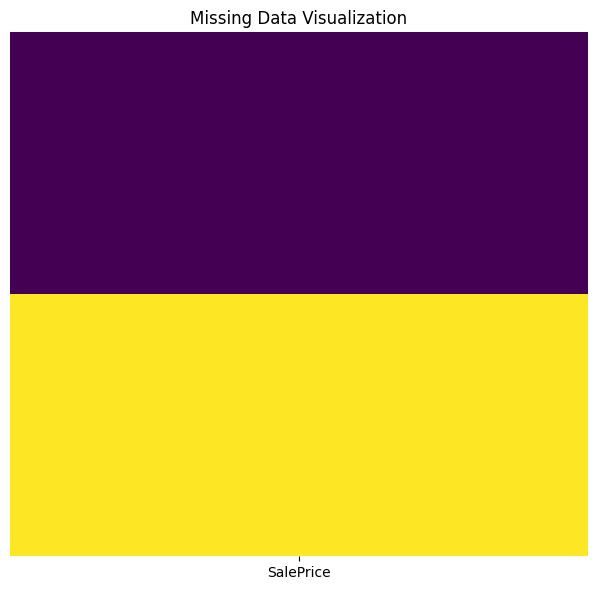

In [27]:
dataset_summary(merged_dataset, show_all_columns=False, visualize=True)

This code cell splits the merged dataset into two parts: `original_train` containing the first 1460 rows for training, and `original_test` containing the remaining rows for testing, as per the initial arrangement.


In [28]:
# Split the merged dataset into training and testing sets
# The first 1460 rows are for training, and the remaining rows are for testing
original_train = merged_dataset.iloc[:1460]
original_test = merged_dataset.iloc[1460:]

## Feature Engineering

This code defines two functions, `plot_correlation` and `plot_mutual_information`, to visualize the correlation and mutual information between features and the target variable. It standardizes numerical features, calculates correlation or mutual information scores, and plots the results using bar plots. The functions are then applied to the features and target variables of a dataset, specifically for the 'SalePrice' target column.

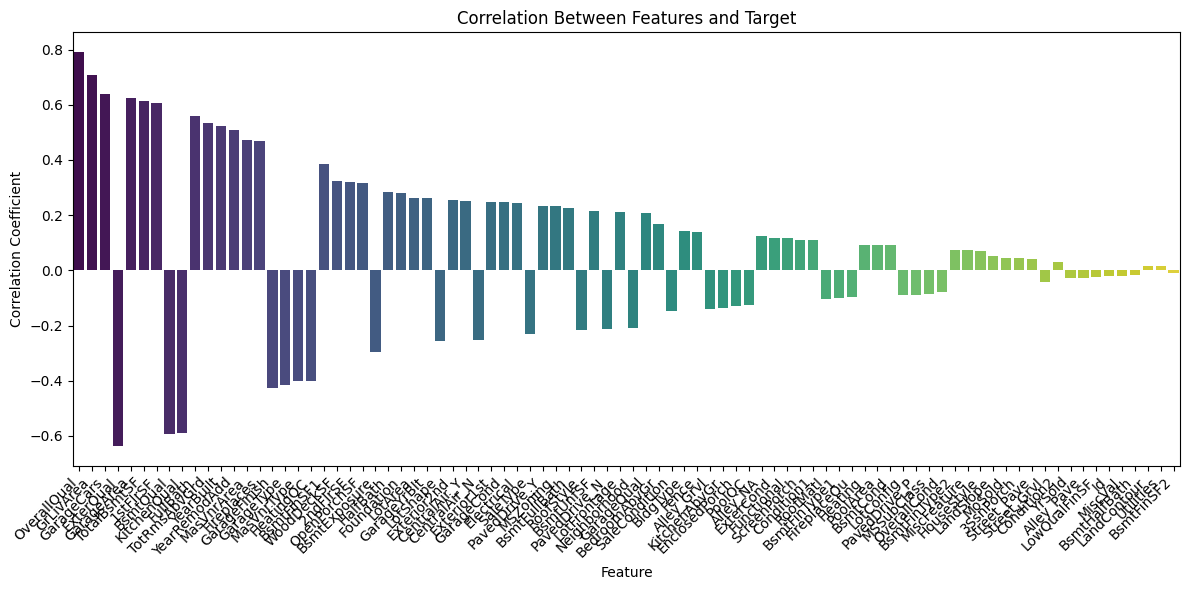

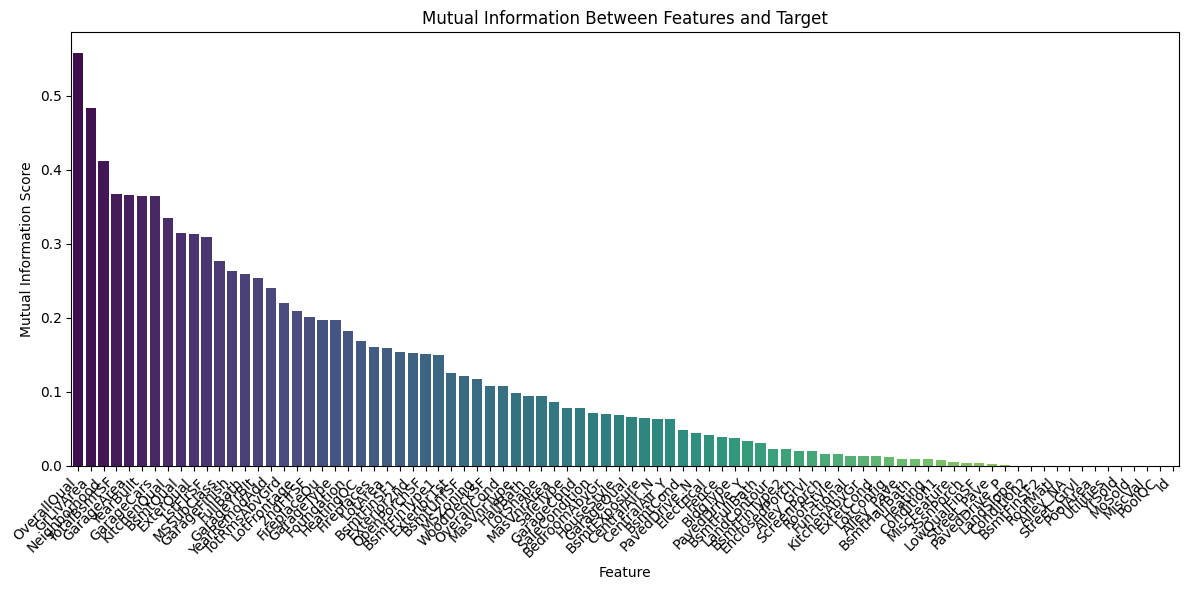

In [29]:
def plot_correlation(features, target, descending=True):
    """
    Plot the correlation between features and the target variable.

    Parameters:
    - features: DataFrame, input features.
    - target: Series, target variable.
    - descending: bool, order correlations in descending order if True.

    Returns:
    None
    """
    # Calculate correlation between features and target
    correlations = features.corrwith(target)

    # Sort features by correlation
    sorted_correlations = correlations.abs().sort_values(ascending=not descending)

    # Plot the correlations using a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_correlations.index, y=correlations[sorted_correlations.index], palette="viridis")
    plt.title('Correlation Between Features and Target')
    plt.xlabel('Feature')
    plt.ylabel('Correlation Coefficient')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_mutual_information(features, target, descending=True):
    """
    Plot the mutual information between features and the target variable.

    Parameters:
    - features: DataFrame, input features.
    - target: Series, target variable.
    - descending: bool, order mutual information scores in descending order if True.

    Returns:
    None
    """
    # Standardize numerical features
    numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
    features[numerical_features] = StandardScaler().fit_transform(features[numerical_features])

    # Calculate mutual information between features and target
    mi_scores = mutual_info_regression(features, target, discrete_features='auto', random_state=42)

    # Create a DataFrame for easier sorting
    mi_df = pd.DataFrame({'Feature': features.columns, 'Mutual_Information': mi_scores})
    
    # Sort features by mutual information
    sorted_mi_df = mi_df.sort_values(by='Mutual_Information', ascending=not descending)

    # Plot the mutual information scores using a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=sorted_mi_df['Feature'], y=sorted_mi_df['Mutual_Information'], palette="viridis")
    plt.title('Mutual Information Between Features and Target')
    plt.xlabel('Feature')
    plt.ylabel('Mutual Information Score')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Specify the target column and extract features and target
target_column = 'SalePrice'
features = original_train.drop(columns=[target_column])
target = original_train[target_column]

# Plot correlation in descending order
plot_correlation(features, target, descending=True)

# Plot mutual information in descending order
plot_mutual_information(features, target, descending=True)

This code defines and utilizes functions for calculating correlation, mutual information, and combined feature importance based on these two metrics. The target column, features, and combined result are then printed and displayed.

- **`correlation_table`**: Computes the correlation between features and the target.
- **`mutual_information_table`**: Calculates mutual information between features and the target, with numerical feature standardization.
- **`combined_feature_importance`**: Combines correlation and mutual information results, calculates the mean absolute score, and sorts the features accordingly.

Finally, the target column, features, and the combined feature importance table are printed.


In [30]:
def correlation_table(features, target, descending=True):
    """
    Create a correlation table between features and target.

    Parameters:
    - features: DataFrame, input features
    - target: Series, target variable
    - descending: bool, sort in descending order (default=True)

    Returns:
    - correlation_table: DataFrame, table with columns 'Column Name' and 'Correlation'
    """
    # Set Pandas display options to show all columns without truncation
    pd.set_option('display.max_rows', None)

    # Calculate correlation between features and target
    correlations = features.corrwith(target)

    # Sort features by correlation
    sorted_correlations = correlations.abs().sort_values(ascending=not descending)

    # Create a DataFrame for the table
    correlation_table = pd.DataFrame({'Column Name': sorted_correlations.index, 'Correlation': correlations[sorted_correlations.index]})

    return correlation_table

def mutual_information_table(features, target, descending=True):
    """
    Create a table of mutual information between features and target.

    Parameters:
    - features: DataFrame, input features
    - target: Series, target variable
    - descending: bool, sort in descending order (default=True)

    Returns:
    - mi_table: DataFrame, table with columns 'Column Name' and 'Mutual Information'
    """
    # Set Pandas display options to show all columns without truncation
    pd.set_option('display.max_rows', None)

    # Standardize numerical features
    numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
    features[numerical_features] = StandardScaler().fit_transform(features[numerical_features])

    # Calculate mutual information between features and target
    mi_scores = mutual_info_regression(features, target, discrete_features='auto', random_state=42)

    # Create a DataFrame for the table
    mi_table = pd.DataFrame({'Column Name': features.columns, 'Mutual Information': mi_scores})
    
    # Sort features by mutual information
    mi_table = mi_table.sort_values(by='Mutual Information', ascending=not descending)

    return mi_table

def combined_feature_importance(features, target, descending=True):
    """
    Calculate combined feature importance based on correlation and mutual information.

    Parameters:
    - features: DataFrame, input features
    - target: Series, target variable
    - descending: bool, sort in descending order (default=True)

    Returns:
    - combined_result: DataFrame, table with columns 'Column Name', 'Correlation', 'Mutual Information', and 'Mean_Abs_Score'
    """
    # Calculate correlation table
    correlation_result = correlation_table(features, target, descending=False)

    # Calculate mutual information table
    mi_result = mutual_information_table(features, target, descending=False)

    # Merge the two results on 'Column Name'
    combined_result = pd.merge(correlation_result, mi_result, on='Column Name')

    # Compute the mean of absolute values of correlation and mutual information
    combined_result['Mean_Abs_Score'] = combined_result[['Correlation', 'Mutual Information']].abs().mean(axis=1)

    # Sort the result by the mean absolute score
    combined_result = combined_result.sort_values(by='Mean_Abs_Score', ascending=descending)

    return combined_result[['Column Name','Mean_Abs_Score']]

# Set the target column
target_column = 'SalePrice'

# Extract features and target
features = original_train.drop(columns=[target_column])
target = original_train[target_column]

# Get combined feature importance table in descending order
combined_result = combined_feature_importance(features, target, descending=True)
print(combined_result)




      Column Name  Mean_Abs_Score
0      BsmtFinSF2        0.005689
1       Utilities        0.007157
4         MiscVal        0.010595
5              Id        0.010958
3    BsmtHalfBath        0.013077
8          YrSold        0.014461
6    LowQualFinSF        0.014632
9      Condition2        0.015311
7      Alley_Pave        0.018572
2     LandContour        0.018990
10    Street_Grvl        0.020518
11    Street_Pave        0.021982
13         MoSold        0.023216
12      3SsnPorch        0.024380
14      LandSlope        0.025730
16    MiscFeature        0.038974
20   PavedDrive_P        0.045160
23       PoolArea        0.046202
17   BsmtFinType2        0.047372
21      LotConfig        0.049967
24        Heating        0.051024
27       RoofMatl        0.052350
28     Condition1        0.059117
32       Alley_NA        0.061806
33         PoolQC        0.063035
29    ScreenPorch        0.063814
31      ExterCond        0.064923
30     Functional        0.065066
15     HouseSt

The code cell extracts the target column 'SalePrice' and separates the features (X) and target variable (y) 
for the training set (original_train). It also extracts features (X) for the testing set (original_test). 

In [31]:
# Define the target column
target_column = 'SalePrice'

# Extract features (X) and target variable (y) for training set
X_train = original_train.drop(columns=[target_column])
y_train = original_train[target_column]

# Extract features (X) for the testing set
X_test = original_test.drop(columns=[target_column])

## Random Forest Hyperparameter Tuning and Predictions

This cell performs hyperparameter tuning for a Random Forest Regressor using `GridSearchCV`. It searches through a predefined parameter grid, including the number of estimators, maximum depth, minimum samples split, and minimum samples leaf. The best hyperparameters are then used to train the model on the full training data. Subsequently, predictions are made on the testing set, and the results, including IDs and predictions, are saved to a CSV file named 'predictions_random_forest.csv'. The tuned Random Forest model is created using the best hyperparameters for improved performance.


In [32]:
# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = grid_search_rf.best_params_
print(f'Best Hyperparameters: {best_params_rf}')

# Train the model on the full training data with the best hyperparameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions_rf = best_rf_model.predict(X_test)

# Create a DataFrame with IDs and Predictions for Random Forest
results_rf_df = pd.DataFrame({'Id': original_test['Id'], 'SalePrice': predictions_rf})
# Save the results to a CSV file for Random Forest
results_rf_df.to_csv('predictions_random_forest.csv', index=False)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


## Gradient Boosting Hyperparameter Tuning and Prediction

This cell performs hyperparameter tuning for a Gradient Boosting Regressor using `GridSearchCV`. It splits the training data into a subset for hyperparameter tuning and validation. The hyperparameters are optimized using mean squared error as the scoring metric. The best hyperparameters are then used to train the final Gradient Boosting model on the full training data. The model's predictions are generated for the testing set, and the results, including the IDs and predictions, are saved to a CSV file named 'predictions_gradient_boosting.csv'.


In [ ]:
# Split the training data for hyperparameter tuning
X_train_hyper, X_val_hyper, y_train_hyper, y_val_hyper = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# Create a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Use GridSearchCV for hyperparameter tuning
grid_search_gb = GridSearchCV(gb_model, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train_hyper, y_train_hyper)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print(f'Best Hyperparameters: {best_params_gb}')

# Train the model on the full training data with the best hyperparameters
best_gb_model = GradientBoostingRegressor(**best_params_gb, random_state=42)
best_gb_model.fit(X_train, y_train)

# Make predictions on the testing set
predictions_gb = best_gb_model.predict(X_test)

# Create a DataFrame with IDs and Predictions for Gradient Boosting
results_gb_df = pd.DataFrame({'Id': original_test['Id'], 'SalePrice': predictions_gb})

# Save the results to a CSV file for Gradient Boosting
results_gb_df.to_csv('predictions_gradient_boosting.csv', index=False)